In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
# cancer data collection

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())



cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print('Shape of cancer data: ', cancer.data.shape)

Shape of cancer data:  (569, 30)


In [4]:
print('Sample counts per class:\n ', {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
  {'malignant': 212, 'benign': 357}


In [5]:
print('Feature names:\n ', cancer.feature_names)

Feature naems:
  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


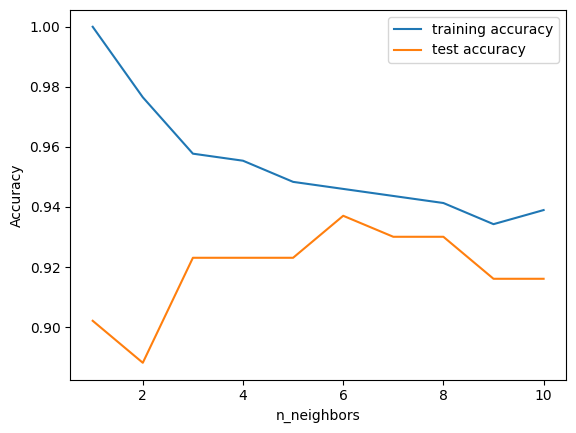

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)

    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [9]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3}'.format(logreg.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.965


c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.93


c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


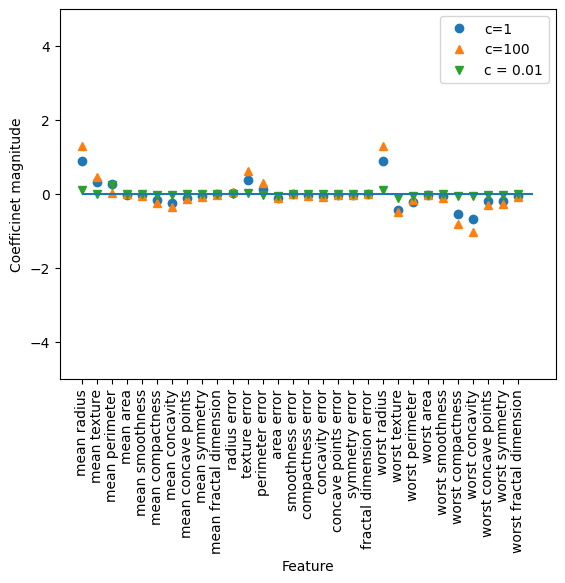

In [13]:
plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label = 'c=100')
plt.plot(logreg001.coef_.T, 'v', label = 'c = 0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation =90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Coefficinet magnitude')
plt.legend()

c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\burke\venv_python\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Training accuracy of l1 logreg with X=0.010: 0.93
Test accuracy of l1 logreg with X=0.010: 0.93
Training accuracy of l1 logreg with X=1.000: 0.94
Test accuracy of l1 logreg with X=1.000: 0.96
Training accuracy of l1 logreg with X=100.000: 0.94
Test accuracy of l1 logreg with X=100.000: 0.97


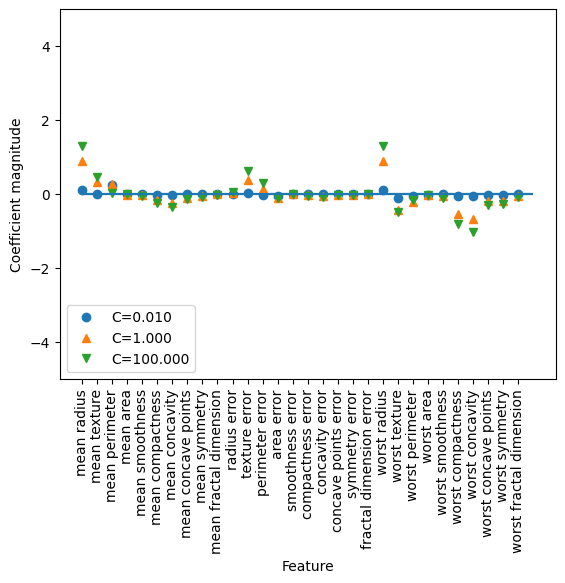

In [15]:
for C, marker in zip([0.01, 1, 100], ['o','^','v']):
    # should show penalty = l1 but get an error when ran with that penalty
    lr_l1 = LogisticRegression(C=C, penalty='l2').fit(X_train, y_train)
    
    print('Training accuracy of l1 logreg with X={:.3f}: {:.2f}'.format(
        C, lr_l1.score(X_train, y_train)))

    print('Test accuracy of l1 logreg with X={:.3f}: {:.2f}'.format(
        C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0,0,cancer.data.shape[1])
    plt.xlabel('Feature')
    plt.ylabel('Coefficient magnitude')

    plt.ylim(-5,5)
    plt.legend(loc = 3)

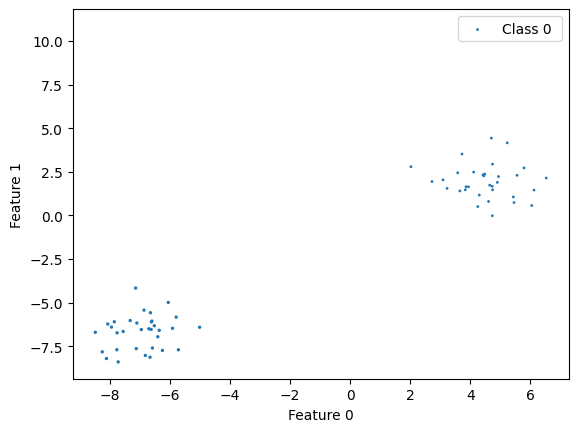

In [20]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)

plt.scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0 ', 'Class 1', 'Class 2'])

In [21]:
X = np.array([
    [0,1,0,1],
    [1,0,1,1],
    [0,0,0,1],
    [1,0,1,0]])

y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)

print('Feature counts:\n', counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [22]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names=['malegnant', 'benign'],
                    feature_names=cancer.feature_names, impurity=False, filled=True)

In [29]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH